# Supervised Learning - Regression

In machine learning, linear regression is one of the simplest algorithms that you can apply relationships between features and labels.

## Importing the modules

The `matplotlib` and `pandas` libraries works for exploratory data analysis and visualizations. However, we're going to borrow a little bit from the `seaborn` and `scipy` for our simple regression model example

In [1]:
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('seaborn-whitegrid') # for users with a very old version of jupyter notebook

%matplotlib inline

# A Simple Regression Model

First we need to start with a simple linear regression. Linear Regression attempts to model the relationship between different variables. The following shows an example of height and weight.


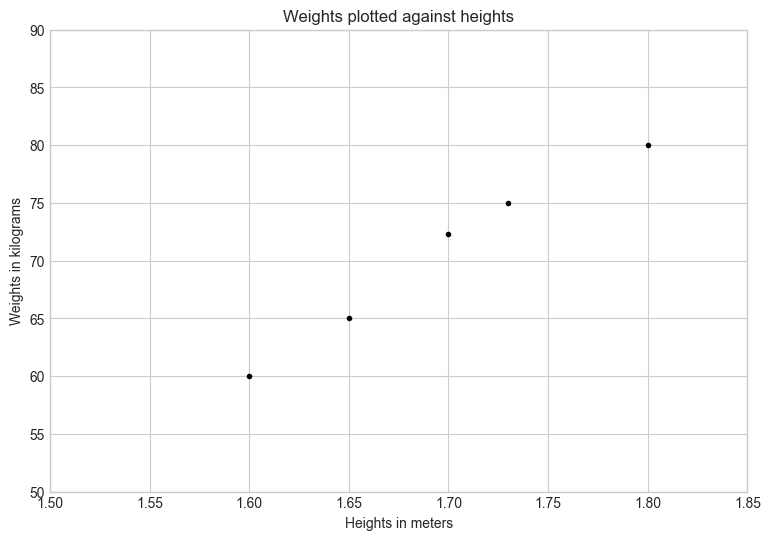

In [3]:
fig = plt.figure(figsize=(9,6))
# represents the heights of a group of people in meters
heights = [1.6, 1.65, 1.7, 1.73, 1.8]
# represents the weights of a group of people in kgs
weights = [60, 65, 72.3, 75, 80]
plt.title('Weights plotted against heights')
plt.xlabel('Heights in meters')
plt.ylabel('Weights in kilograms')
plt.plot(heights, weights, 'k.')
# axis range for x and y
plt.axis([1.5, 1.85, 50, 90])
plt.show()

There's a positive correlation between the weights and heights for people. We can draw a straight line through the points and use that this to predict the weight of another person based on their height.

### Plotting the Linear Regression Line

We can use the `Seaborn` and the `scipy` libraries to help use with plotting the regression line.

Correlation = 0.9999999999999999
Correlation of Determination (R^2) = 0.9999999999999998


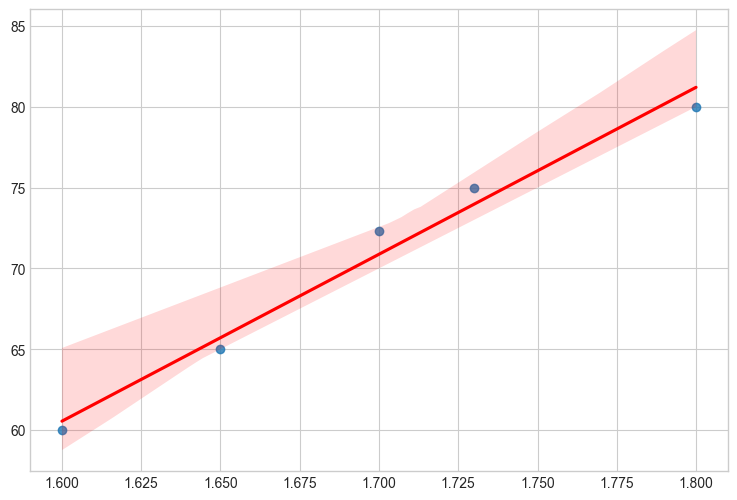

In [4]:
fig = plt.figure(figsize=(9, 6))
p = sns.regplot(x=heights, y=weights, line_kws={'color': 'red'})
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())


print('Correlation = {}'.format(r))
print('Correlation of Determination (R^2) = {}'.format(r**2))


The correlation between height and weight is very strong (.99999). We also have the coefficient of determination ($R^2$) of $.999$, which means $99\%$ of the variability in weight can be explained by the height of a person.

The red line represents the smallest average distance of all points. This is known as the regression line, or "the line of best fit." The regression line is given by the following formula.

$$
\hat{y}=b_{0}+b_{1}x_{1}
$$

where $b_{0}$ is the y-intercept, $b_{1}$ is the slope (This is the same equation from algebra!)

The formula for the slope, $b_1$, of the best-fitting line is

$$
b_1=r\bigg(\frac{s_y}{s_x}\bigg)
$$

Once we have the slope and y-intercept, we can create a model.

In [5]:
print('The slope is {}'.format(slope))
print('The y-intercept is {}'.format(intercept))

The slope is 103.31046312178368
The y-intercept is -104.75454545454495


The model for our regression line is the following:

$$
\hat{y} = -104.75 + 103.31x_1
$$

We can attempt to predict one our variables for weight $(x_1=1.6)$

In [6]:
# using our model to predict a value
predict_y = intercept + slope * heights[1]

# results from comparing the predicted value to the observed
print('Predicted Weight: {}'.format(predict_y))
print('Actual Weight: {}'.format(weights[1]))
print('The error is: {}'.format(weights[1] - predict_y))



Predicted Weight: 65.70771869639812
Actual Weight: 65
The error is: -0.7077186963981177


This is pretty close to the actual value of 65. The difference between the actual value $(y_i)$ and the predicted value ($\hat{y}$) is .70, so the model is pretty accurate.

## Multilinear Regression and Machine Learning

Now you will learn about a variant of simple linear regression, called *multiple linear regression*, by predicting house prices based on multiple features.

### The Boston Dataset

In the project, we will develop and evaluate the performance a model trained and tested on a data collection from houses in Boston.

In [7]:
# importing the data and showing the first 5 rows
file = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv"
df = pd.read_csv(file, header=1)


In [8]:
# printing the names of the potential features
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Attributes of the Features

The dataset used in this project is from UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represent aggregate information about 14 features of homes from various suburbs located in Boston.

This dataset is from an academic paper titled *Hedonic housing prices and the demand for clean air,* from the Journal of Enviromental Economics and Management (1978): 81-102. ()

- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for lots over 25,000 sq. ft.
- `INDUS`: proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dweelling
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distance to five Boston employment centres
- `RAD`: index of accessibility to radial highway
- `TAX`: full-value property-tax rate per $10,000
- `PTRATIO`: pupil-teacher ratio by town
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population*

**Note:** LSTAT, according to the data documentation in Table IV of Harrison & Rubin (1978) defines `LSTAT` as the proportion of population that is "lower status." Meaning the proportion of adults without some high school education and the proportion of male workers classiied as laborers. Keeping this in mind is important for being able to interpret the data later.

# Attributes of the Target

The target we are trying to predict is the following:

- `MDEV`: Median value of owner-occupied homes in $1000's

## Data Cleaning

The next step would be to clean the data and perform any conversion if necessary. First, use the `info` method to check the data type of each field.

In [10]:
# showing the details of our features
print(df.columns)
print(df.info())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


Sklearn will only recongize our features if they are numerical values. Fortunately, the dataset contains all numerical values, so no need to encode the values.

In [11]:
# verifying that there are no null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The dataset also has no missing values, so everything is good.

## Feature Selection

We don't want to use all 13 features, as they are all not relevant. Instead, we want to choose features that directly influence the result we are looking for (the price of houses) to train the model.

For this, we can use the `corr` function. The `corr` function will calculate the correlation of all the columns in our DataFrame. Not only will we know which features are correlated with the target variable, we will see which features are correlated with other features. 

In [12]:
# calculating the correlation of all our features.
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

This is a lot of data. No way we would be able to read most of this. We can make all of this data more readable by using a heat map visualization.

<Axes: >

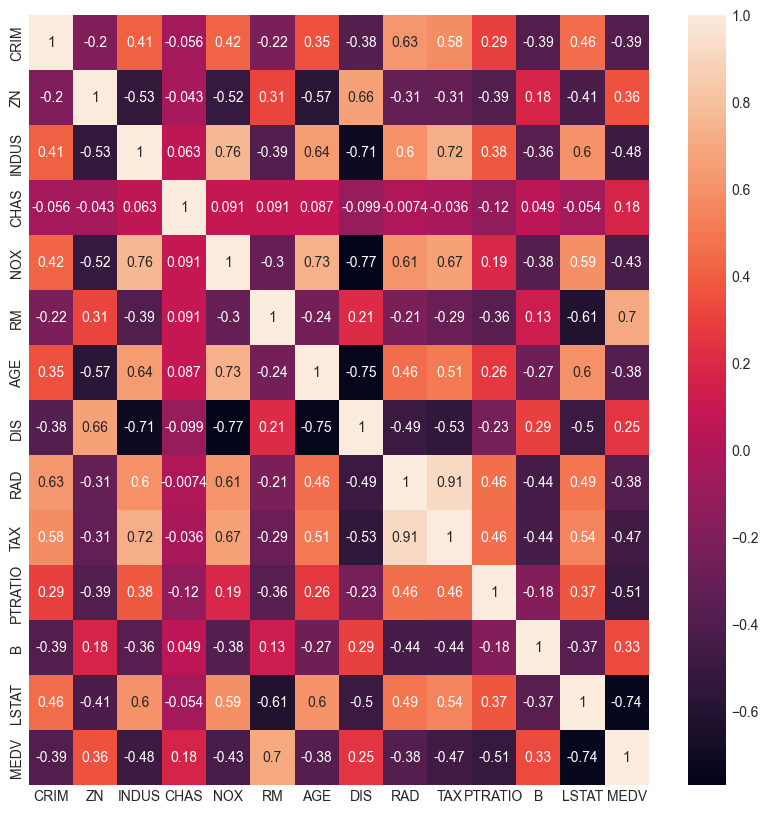

In [16]:
# plotting the correlation matrix.
plt.figure(figsize=(10,10))
corr_df = df.corr()
sns.heatmap(corr_df, annot=True)

Remember, a *positive correlation* is a relationship between two variables in which both variables move together. A *negative correlation* is a relationship between two variables in two variables move in the opposite directions.

We want to find variables that move together with the target vartiable `MEDV`. We can see that the variables `LSTAT` and `RM` have the strongest relationship with the `MEDV`.

In [17]:
# confirms that the features with the strongest relationships with the target.
df.corr().abs().nlargest(3, 'MEDV').index

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')

### Exploratory Data Analysis (Multiple Regression)

We can create a scatter plot with both features in relation with the target variable. We can clearly see that `LSTAT` has a negative correlation with `MEDV` and `RM` has a positive correlation with the target.

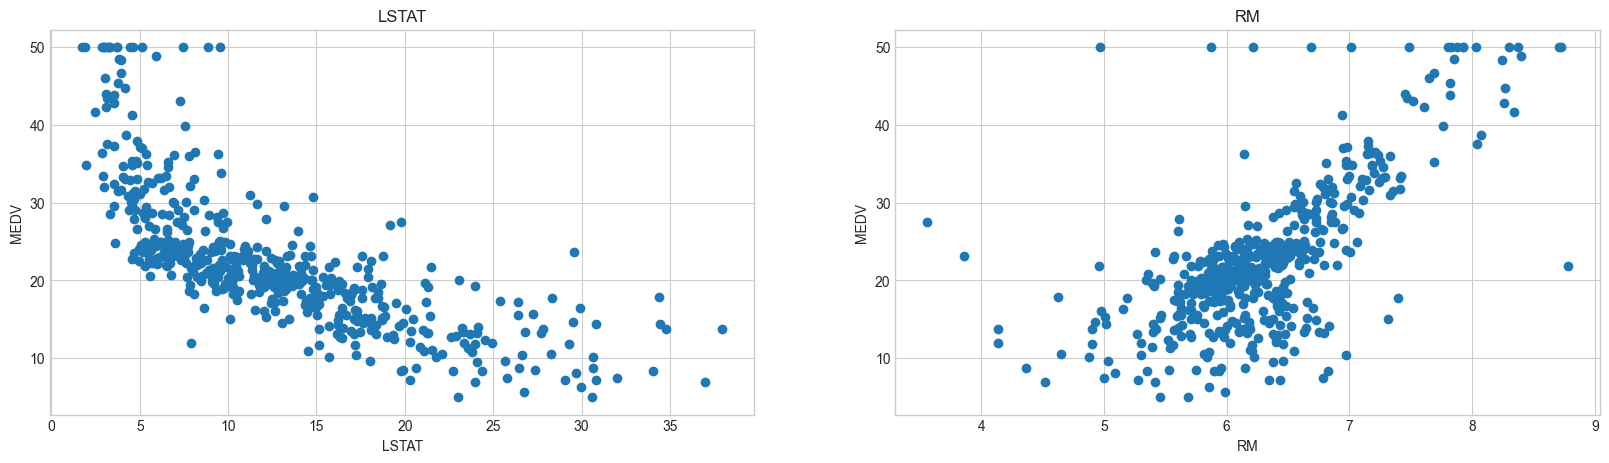

In [18]:
# creating two different scattercharts on the same plot
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Because we are using two features, we need to create a 3-Dimensional plot to see the relationship. We can do this with the `mpl_toolkits.mplot3d` module.

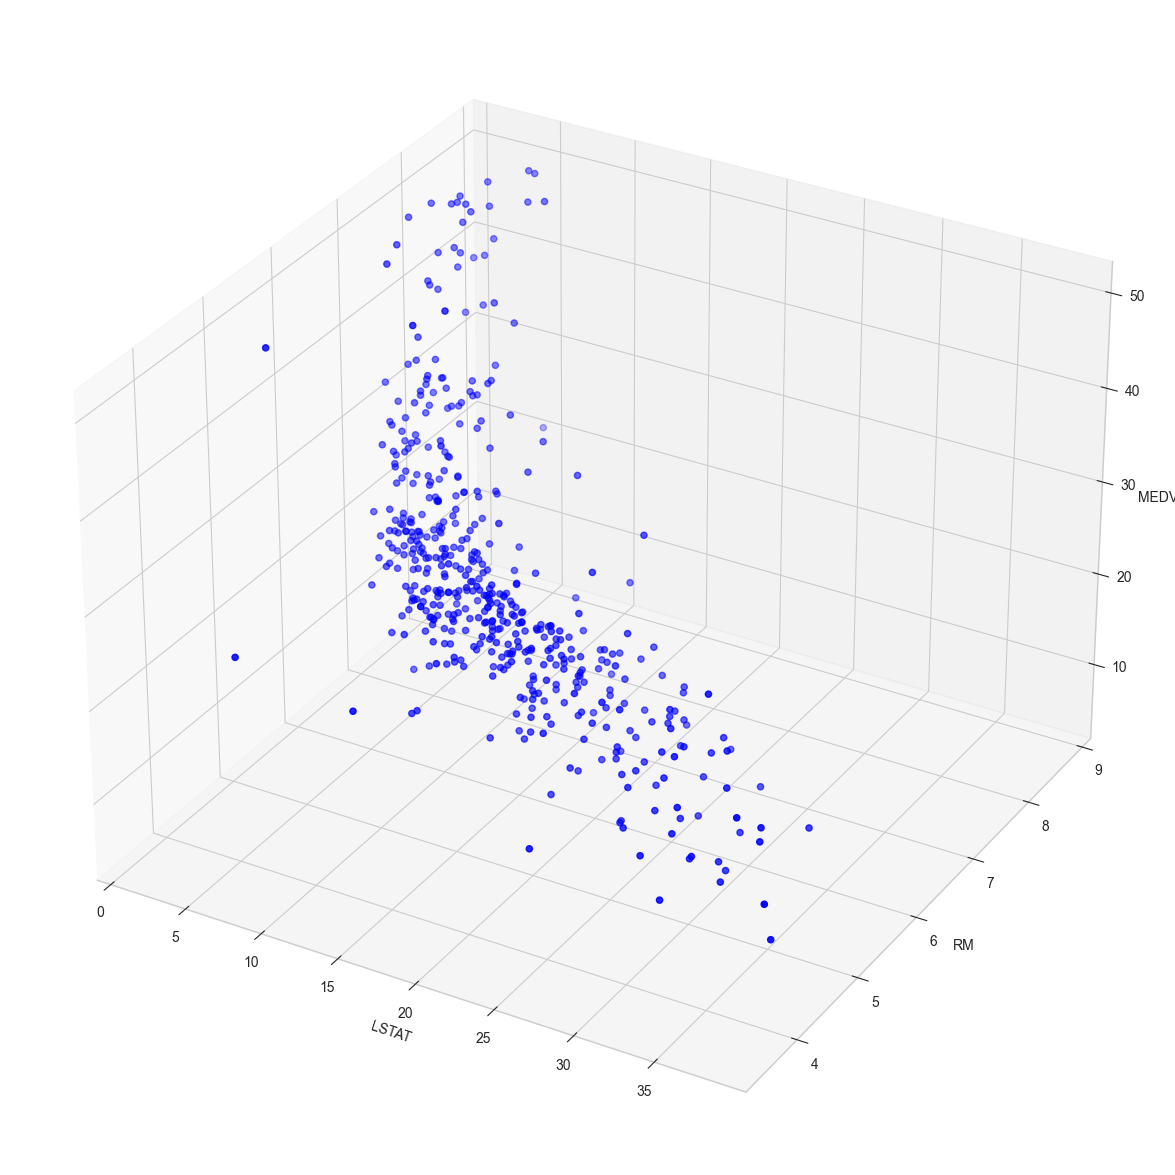

In [19]:
# creating a 3-Dimensional plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
          df['RM'],
          df['MEDV'],
          c='b')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')
plt.show()


## Training the Model

We begin creating two DataFrames for our features (`LSTAT`,`RM`) and one for our target variable (`MEDV`) and then assigning them to two variables.

In [20]:
# assigned the two features to a variable called 'X' and assigning the target variable to a variable 'Y'
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns =['LSTAT', 'RM'])
Y = df['MEDV']

We're going to split the dataset into two sets: one for training and one for testing. To do this, we need to use the `train_test_split()` function. 

We will split the dataset into 70 percent training and 30 percent for testing.

It's important for our training and testing sets to have the same number of observations. We check this with the `shape` method.

In [21]:
# importing the train_test_split model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

# checking the shape of our training and testing models
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


Our `X` training set has 354 rows and 2 columns; our `Y` training set has 354 rows and 1 column. 

Our `X` test set has 152 rows and 2 columns; our `Y` testing set has 152 rows and 1 column.

We're now ready to begin training. We're going to use the `LinearRegression` model from `sklearn`.

In [22]:
# importing the linear regression models and the evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# assigning the linear regression model to a variable 'lin_model'
lin_model = LinearRegression()

# fitting the model to our training set
lin_model.fit(X_train, Y_train)

LinearRegression()

Once the model is trained, we will use the testing set to perform some predictions. We will used the `predict()` function to help us create a model.

In [23]:
# using the training set to make predictions and assigning the results to a variable 'y_train_predict'
y_train_predict = lin_model.predict(X_train)

# measuring the R2 and RMSE for our model and assign the the results to variables rmse and r2
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

# printing the results 
print('The Model performance for training set')
print('-'*25)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

# compairing the performance of our training set to our testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

# printing the results for the testing set
print('The model performance for testing set')
print('-' * 25)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The Model performance for training set
-------------------------
RMSE is 5.291267334085863
R2 score is 0.6493177656003104


The model performance for testing set
-------------------------
RMSE is 6.041044703455954
R2 score is 0.6162026947666575


<Axes: xlabel='MEDV'>

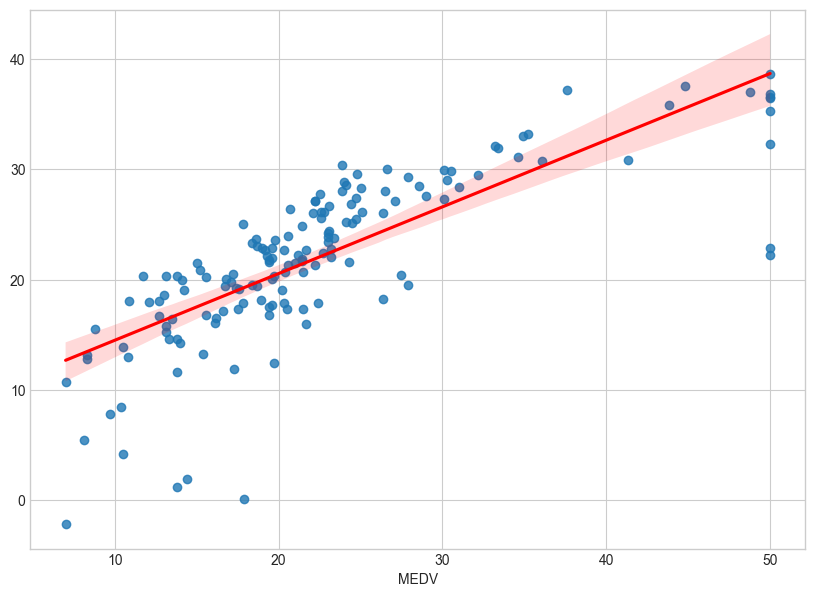

In [24]:
# creating a scatter plot to visualize the difference the training and testing set.
plt.figure(figsize=(10,7))
sns.regplot(x=Y_test, y=y_test_predict, line_kws={'color': 'red'})


### Getting the Intercept and Coefficients

Now we can use the information from our predicted values to create a model. Since we are using two features, we need to reformat our regression formula.

$$\hat{y}=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}$$

where $\hat{y}$ is our target variable, $\beta_{0}$ is the y-intercept, and $\beta_{1}$ and $\beta{2}$ are coefficients for our features $x_1$ and $x_2$.

In [26]:
# printing out the intercept and coefficients of the model
print(lin_model.intercept_)
print(lin_model.coef_)

0.38437936780346504
[-0.65957972  4.83197581]


So now that we have all the coefficients and y-intercept, we can interpret the model as

$$ \hat{y} = 0.3843 + -0.6595 x_1 + 4.8319 x_2 $$

Since the `LSTAT` feature has a negative linear relationship with the target `MDEV`, we can assume that $x_1$ (the variable with the negative coefficient) is `LSTAT` and $x_2$ is `RM`.

We can interept the relationship between `LSTAT` and `MDEV` as: **for every one unit increase in the percentage of the lower status population, we can expect the median value of Boston values to decline by -0.6595.**

We can interept the relationship between `RM` and `MDEV` as: **for every one unit increase in the number of rooms per dwelling, we can expect the median value of Boston properties to increase by 4.831**.

Now we can use this model to make predictions. Let's use $x_1=30$ and $x_2=5$. Meaning, what can we expect the median value Boston properties to be if the percentage of the lower status population (`LSTAT`) was 30% and the number of rooms (`RM`) in the property was 5.

In [29]:
# using the model to make a prediction
print(lin_model.predict([[30,5]]))

[4.75686695]


C:\Users\drebi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Using our model, we can plot the regression line. However, using three variables requires us to use a 3-Dimensional plot.

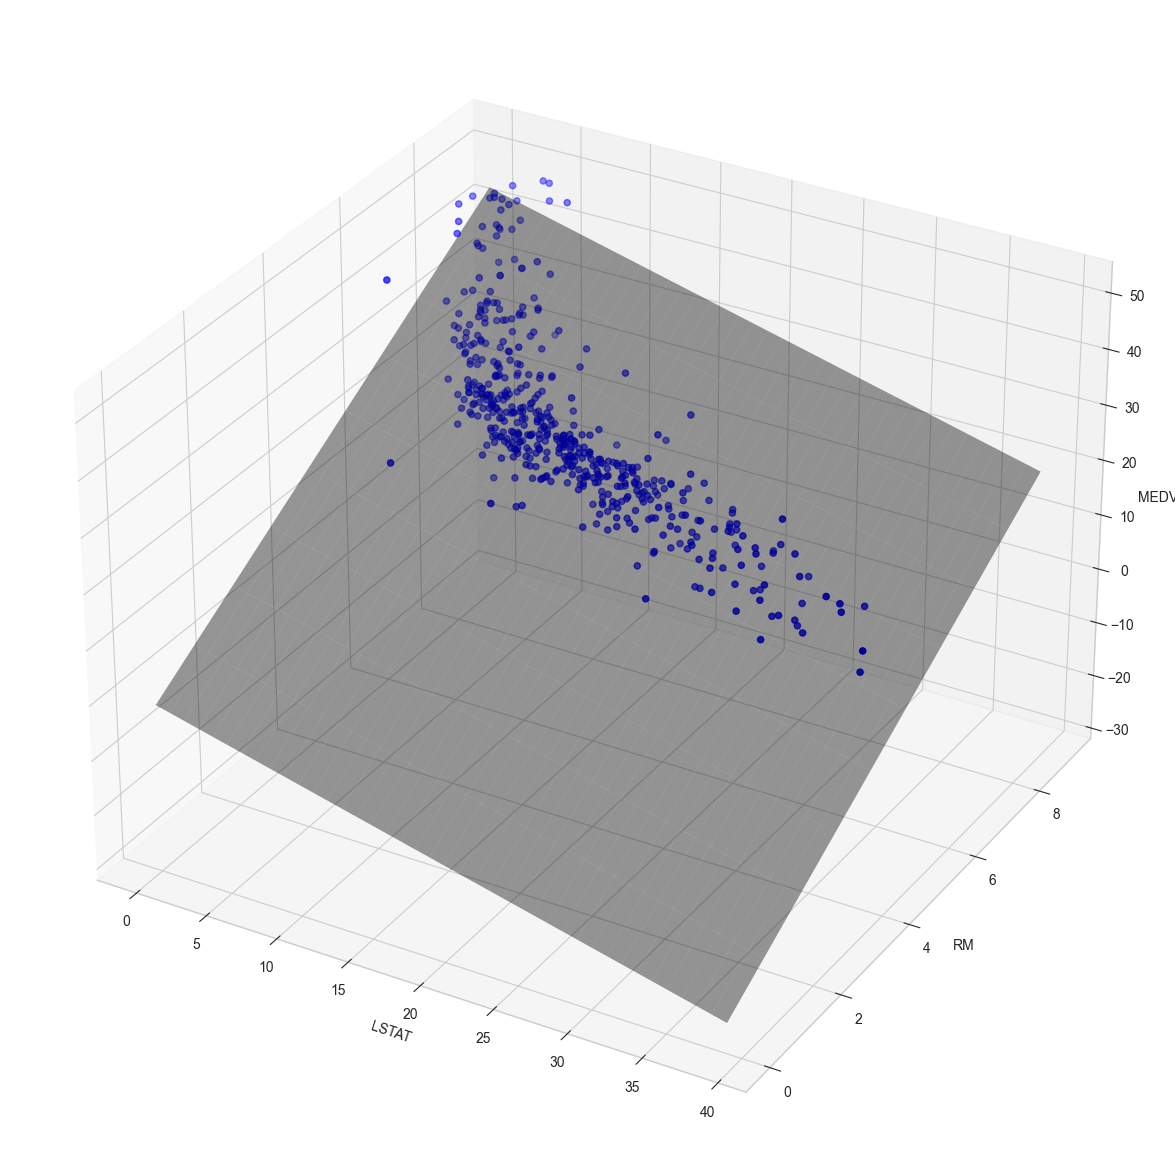

In [30]:
# assigning the features to the variable X and label to the target Y
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

# creeating the figure
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---

x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
plt.show()

As the chart shown in the Notebook is static, we need to save the code snippet into a file named boston.py and run it into a terminal